Official github: [StasBomb](https://github.com/statsbomb/statsbombpy)

# Step 0: Install the needed libraries

In [85]:
import subprocess
import sys

# List of required packages
required_packages = [
    "pandas", "numpy", "matplotlib", "seaborn", "networkx"
]

def install_package(package):
    """Installs a package using pip if it's not already installed."""
    try:
        __import__(package)
        print(f"✅ {package} is already installed.")
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install missing packages
for package in required_packages:
    install_package(package)


✅ pandas is already installed.
✅ numpy is already installed.
✅ matplotlib is already installed.
✅ seaborn is already installed.
✅ networkx is already installed.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Step 1: Install StasBomb Data Library

StatsBomb provides a rich, event-based dataset for football analytics. It includes detailed match event data such as passes, shots, tackles, dribbles, defensive actions, and pressures, with precise spatio-temporal information (x, y coordinates). The 
key Features of StatsBomb Data Library are:

 - Pass Data → Pass origin, destination, type, and success/failure.
 - Shot Data → Shot location, expected goals (xG), outcome (goal, miss, block).
 - Defensive Actions → Tackles, interceptions, pressing intensity.
 - Possession & Transition Data → Who has the ball, where, and under what conditions.

The dataset covers multiple leagues and competitions, including:

 - La Liga
 - Premier League
 - World Cup
 - UEFA Champions League

By using StatsBomb Open Data, we can analyze team formations, player tendencies, and tactical setups in a data-driven way.


In [87]:
install_package("statsbombpy")

✅ statsbombpy is already installed.


In [88]:
from statsbombpy import sb

# Step 2: Load Available Competitions from StatsBomb

In [89]:
# Suppress the authentication warning
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter("ignore", NoAuthWarning)

Let's retrieve all available competitions from the library, orders them by season (from oldest to latest) and diplays them

In [90]:
# Load competitions
competitions = sb.competitions()

# Convert 'season_name' to integer for proper sorting
competitions['season_year'] = competitions['season_name'].str[:4].astype(int)

# Order by season (oldest first)
competitions = competitions.sort_values(by='season_year', ascending=True)

# Count competitions per year
competition_counts = competitions['season_year'].value_counts().sort_index(ascending=False)

# Display competitions in an ordered format
print("Available Competitions in StatsBomb Open Data (Ordered by Year):\n")
for _, row in competitions.iterrows():
    print(f"{row['season_name']} | {row['competition_name']} ({row['competition_gender'].capitalize()})")

# Show the sorted DataFrame for reference
display(competitions)

Available Competitions in StatsBomb Open Data (Ordered by Year):

1958 | FIFA World Cup (Male)
1962 | FIFA World Cup (Male)
1970 | FIFA World Cup (Male)
1970/1971 | Champions League (Male)
1971/1972 | Champions League (Male)
1972/1973 | Champions League (Male)
1973/1974 | La Liga (Male)
1974 | FIFA World Cup (Male)
1977 | North American League (Male)
1977/1978 | Copa del Rey (Male)
1979 | FIFA U20 World Cup (Male)
1981 | Liga Profesional (Male)
1982/1983 | Copa del Rey (Male)
1983/1984 | Copa del Rey (Male)
1986/1987 | Serie A (Male)
1986 | FIFA World Cup (Male)
1988/1989 | UEFA Europa League (Male)
1990 | FIFA World Cup (Male)
1997/1998 | Liga Profesional (Male)
1999/2000 | Champions League (Male)
2003/2004 | Premier League (Male)
2003/2004 | Champions League (Male)
2004/2005 | Champions League (Male)
2004/2005 | La Liga (Male)
2005/2006 | La Liga (Male)
2006/2007 | Champions League (Male)
2006/2007 | La Liga (Male)
2007/2008 | La Liga (Male)
2008/2009 | Champions League (Male)
2008/2

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available,season_year
36,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297,1958
35,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984,1962
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299,1970
20,16,276,Europe,Champions League,male,False,False,1970/1971,2024-02-13T14:24:12.213582,None,None,2024-02-13T14:24:12.213582,1970
19,16,71,Europe,Champions League,male,False,False,1971/1972,2024-02-12T14:25:01.735880,2021-06-13T16:17:31.694,None,2024-02-12T14:25:01.735880,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596,2023
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825,2023
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676,2023
21,223,282,South America,Copa America,male,False,True,2024,2024-07-15T18:00:33.653673,None,None,2024-07-15T18:00:33.653673,2024


# Step 3: Load Matches for a Specific Competition

Let's select a specific competition (e.g., La Liga 2020/21) and retrieve all the matches from that season. This is useful to explore match details, including:

- Match ID (needed to extract events later)
- Teams playing (home and away)
- Date of the match

In [91]:
# Select a competition (e.g., La Liga 2020/21)
competition_id = 11  # La Liga
season_id = 90       # 2020/21 season

# Load matches for the selected competition
matches = sb.matches(competition_id=competition_id, season_id=season_id)

# Display useful match information
print(f"📌 Matches for La Liga 2020/21 (Competition ID: {competition_id}, Season ID: {season_id})\n")

# Print formatted match list
for _, row in matches.iterrows():
    print(f"📅 {row['match_date']} | ⚽ {row['home_team']} vs {row['away_team']}")


📌 Matches for La Liga 2020/21 (Competition ID: 11, Season ID: 90)

📅 2020-10-31 | ⚽ Deportivo Alavés vs Barcelona
📅 2021-01-09 | ⚽ Granada vs Barcelona
📅 2021-05-16 | ⚽ Barcelona vs Celta Vigo
📅 2021-02-07 | ⚽ Real Betis vs Barcelona
📅 2021-03-06 | ⚽ Osasuna vs Barcelona
📅 2021-04-10 | ⚽ Real Madrid vs Barcelona
📅 2020-12-13 | ⚽ Barcelona vs Levante UD
📅 2020-09-27 | ⚽ Barcelona vs Villarreal
📅 2020-10-01 | ⚽ Celta Vigo vs Barcelona
📅 2020-10-24 | ⚽ Barcelona vs Real Madrid
📅 2021-01-03 | ⚽ Huesca vs Barcelona
📅 2020-10-04 | ⚽ Barcelona vs Sevilla
📅 2020-10-17 | ⚽ Getafe vs Barcelona
📅 2020-11-21 | ⚽ Atlético Madrid vs Barcelona
📅 2020-12-19 | ⚽ Barcelona vs Valencia
📅 2021-04-29 | ⚽ Barcelona vs Granada
📅 2021-05-08 | ⚽ Barcelona vs Atlético Madrid
📅 2021-05-11 | ⚽ Levante UD vs Barcelona
📅 2021-05-02 | ⚽ Valencia vs Barcelona
📅 2021-03-15 | ⚽ Barcelona vs Huesca
📅 2021-04-22 | ⚽ Barcelona vs Getafe
📅 2021-03-21 | ⚽ Real Sociedad vs Barcelona
📅 2020-12-16 | ⚽ Barcelona vs Real Socieda

# Step 4: Select a Specific Match and Load Event Data

Let's select a specific game and load the data of that event. For example, let's find both matches between Barcelona and Real Madrid in La Liga 2020/21, also known as El Clásico.

We will display both:

- First Leg: First match of the season between the two teams.
- Second Leg: Return match later in the season.

In [92]:
# Filter for Barcelona vs Real Madrid (both home & away games)
clasico_matches = matches[
    ((matches["home_team"] == "Barcelona") & (matches["away_team"] == "Real Madrid")) |
    ((matches["home_team"] == "Real Madrid") & (matches["away_team"] == "Barcelona"))
]

# Ensure that two matches are found
if clasico_matches.shape[0] < 2:
    print("Not enough matches found for Barcelona vs Real Madrid in this dataset.")
else:
    # Sort matches by date 
    clasico_matches = clasico_matches.sort_values(by="match_date")

    # First match
    match_id_1 = clasico_matches.iloc[0]["match_id"]
    home_team_1 = clasico_matches.iloc[0]["home_team"]
    away_team_1 = clasico_matches.iloc[0]["away_team"]
    match_date_1 = clasico_matches.iloc[0]["match_date"]
    home_score_1 = clasico_matches.iloc[0]["home_score"]
    away_score_1 = clasico_matches.iloc[0]["away_score"]

    # Second match
    match_id_2 = clasico_matches.iloc[1]["match_id"]
    home_team_2 = clasico_matches.iloc[1]["home_team"]
    away_team_2 = clasico_matches.iloc[1]["away_team"]
    match_date_2 = clasico_matches.iloc[1]["match_date"]
    home_score_2 = clasico_matches.iloc[1]["home_score"]
    away_score_2 = clasico_matches.iloc[1]["away_score"]

    # Print both matches
    print(f"📌 El Clásico Matches in La Liga 2020/21:\n")
    print(f"🔹 [ID: {match_id_1}] 📅 {match_date_1} | ⚽ {home_team_1} - {away_team_1} {home_score_1}:{away_score_1}")
    print(f"🔹 [ID: {match_id_2}] 📅 {match_date_2} | ⚽ {home_team_2} - {away_team_2} {home_score_2}:{away_score_2}")


📌 El Clásico Matches in La Liga 2020/21:

🔹 [ID: 3773585] 📅 2020-10-24 | ⚽ Barcelona - Real Madrid 1:3
🔹 [ID: 3773497] 📅 2021-04-10 | ⚽ Real Madrid - Barcelona 2:1


# Step 5: Analyze Team Shape and Average Player Positions

We will calculate and visualize:

- The average position of each player during the match
- How the team shape evolves by dividing the match into halves
- Compare the positioning of both teams

In [93]:
# Load events for the first El Clásico match
events = sb.events(match_id=match_id_1) # you can also use match_id_2

# "Starting XI" rows for each team
home_team = events.loc[events['type'] == 'Starting XI', 'team'].unique()[0]
away_team = events.loc[events['type'] == 'Starting XI', 'team'].unique()[1]

print("Home Team:", home_team)
print("Away Team:", away_team)

Home Team: Barcelona
Away Team: Real Madrid


In [94]:
# Extract the Starting XI for each team and build a map of player names to jersey numbers
def build_xi_jersey_map(events_df, team_name):
    """
    Returns a dict mapping:
       "Lionel Andrés Messi Cuccittini" -> 10,
       "Frenkie de Jong" -> 21, 
       etc...
    for that team's Starting XI.
    """
    row = events_df[
        (events_df['type'] == 'Starting XI') &
        (events_df['team'] == team_name)
    ].iloc[0]
    
    lineup = row['tactics']['lineup']
    
    jersey_map = {}
    for pl in lineup:
        player_dict = pl.get('player', {})
        full_name   = player_dict.get('name', "Unknown_Player")
        jersey_num  = pl.get('jersey_number', None)
        
        # e.g., "Lionel Andrés Messi Cuccittini": 10
        jersey_map[full_name] = jersey_num
    
    return jersey_map


home_jersey_map = build_xi_jersey_map(events, home_team)
away_jersey_map = build_xi_jersey_map(events, away_team)

print("Home XI jersey map:\n", home_jersey_map)
print("\nAway XI jersey map:\n", away_jersey_map)


Home XI jersey map:
 {'Norberto Murara Neto': 13, 'Sergino Dest': 2, 'Gerard Piqué Bernabéu': 3, 'Clément Lenglet': 15, 'Jordi Alba Ramos': 18, 'Sergio Busquets i Burgos': 5, 'Frenkie de Jong': 21, 'Pedro González López': 16, 'Philippe Coutinho Correia': 14, 'Anssumane Fati': 22, 'Lionel Andrés Messi Cuccittini': 10}

Away XI jersey map:
 {'Thibaut Courtois': 1, 'José Ignacio Fernández Iglesias': 6, 'Raphaël Varane': 5, 'Sergio Ramos García': 4, 'Ferland Mendy': 23, 'Carlos Henrique Casimiro': 14, 'Federico Santiago Valverde Dipetta': 15, 'Toni Kroos': 8, 'Marco Asensio Willemsen': 11, 'Vinícius José Paixão de Oliveira Júnior': 20, 'Karim Benzema': 9}


In [95]:
# Filter events to only include the Starting XI players

all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

events_starters = events[events['player'].isin(all_starters)].copy()

def get_jersey_number(player_name):
    if player_name in home_jersey_map:
        return home_jersey_map[player_name]
    elif player_name in away_jersey_map:
        return away_jersey_map[player_name]
    else:
        return None

events_starters['jersey_number'] = events_starters['player'].apply(get_jersey_number)

print("Original events shape:", events.shape[0])
print("Filtered (starters only) shape:", events_starters.shape[0])


Original events shape: 4213
Filtered (starters only) shape: 3924


In [96]:
# Compute average positions for each player

def compute_average_positions(df):
    """
    Group by (player, jersey_number), average their 'location'.
    Return columns: [player, jersey_number, x, y].
    """
    d = df.dropna(subset=['location']).copy()
    
    d['x'] = d['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    d['y'] = d['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    
    avg_positions = (
        d.groupby(['player','jersey_number'], as_index=False)
         .agg({'x':'mean','y':'mean'})
    )
    return avg_positions

home_events = events_starters[events_starters['team'] == home_team]
away_events = events_starters[events_starters['team'] == away_team]

home_avg_positions = compute_average_positions(home_events)
away_avg_positions = compute_average_positions(away_events)

home_avg_positions


,player,jersey_number,x,y
0,Anssumane Fati,22,77.830275,39.996330
1,Clément Lenglet,15,38.922051,22.309744
2,Frenkie de Jong,21,62.520168,21.523109
3,Gerard Piqué Bernabéu,3,38.354167,49.375000
4,Jordi Alba Ramos,18,69.016749,11.050739
5,Lionel Andrés Messi Cuccittini,10,74.355185,39.164815
6,Norberto Murara Neto,13,8.526415,39.360377
7,Pedro González López,16,68.355844,59.520130
8,Philippe Coutinho Correia,14,73.484810,25.563291
9,Sergino Dest,2,62.950777,67.466321


In [97]:
# Define a function to plot average positions
def draw_pitch(ax=None):
    """
    Draw a 120 x 80 pitch (StatsBomb dimensions) on the given Axes.
    (0,0) is top-left, (120,80) is bottom-right.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set pitch background
    ax.set_facecolor("green")
    
    # Outer boundaries
    ax.plot([0,0],[0,80], color="white")
    ax.plot([120,120],[0,80], color="white")
    ax.plot([0,120],[0,0], color="white")
    ax.plot([0,120],[80,80], color="white")
    
    # Center line
    ax.plot([60,60],[0,80], color="white")
    
    # Center circle
    center_circle = plt.Circle((60, 40), 10, color="white", fill=False)
    ax.add_patch(center_circle)
    
    # Penalty areas
    # Left penalty area
    ax.plot([0, 18], [18, 18], color="white")
    ax.plot([18,18], [18,62], color="white")
    ax.plot([0,18], [62,62], color="white")
    
    # Left goal area
    ax.plot([0,6],[30,30], color="white")
    ax.plot([6,6],[30,50], color="white")
    ax.plot([0,6],[50,50], color="white")
    
    # Right penalty area
    ax.plot([120,102],[18,18], color="white")
    ax.plot([102,102],[18,62], color="white")
    ax.plot([120,102],[62,62], color="white")
    
    # Right goal area
    ax.plot([120,114],[30,30], color="white")
    ax.plot([114,114],[30,50], color="white")
    ax.plot([120,114],[50,50], color="white")
    
    # Penalty spots
    ax.plot([12],[40], marker='o', markersize=3, color="white")
    ax.plot([108],[40], marker='o', markersize=3, color="white")
    
    # Flip y-axis so top=0
    ax.set_xlim(0,120)
    ax.set_ylim(80,0)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    return ax

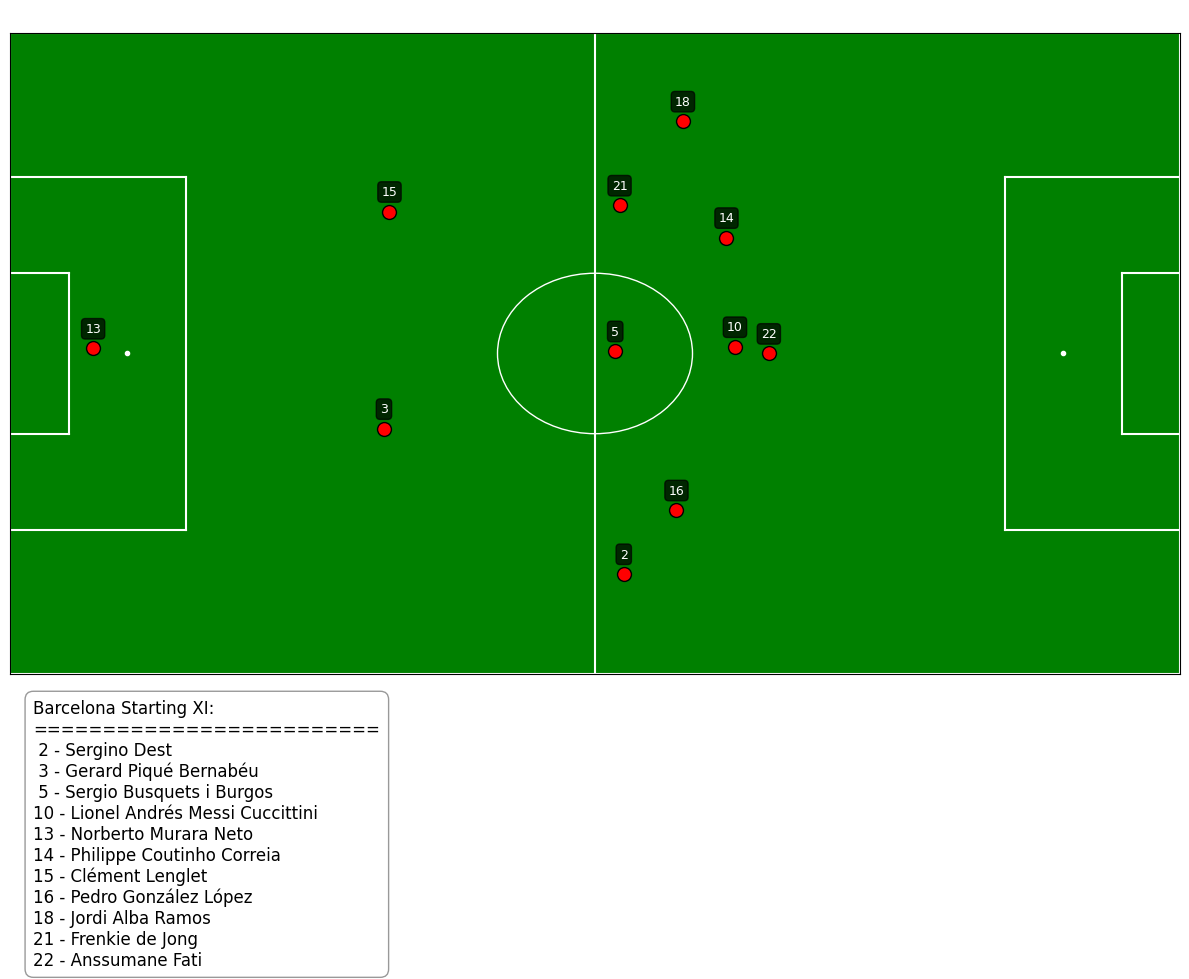

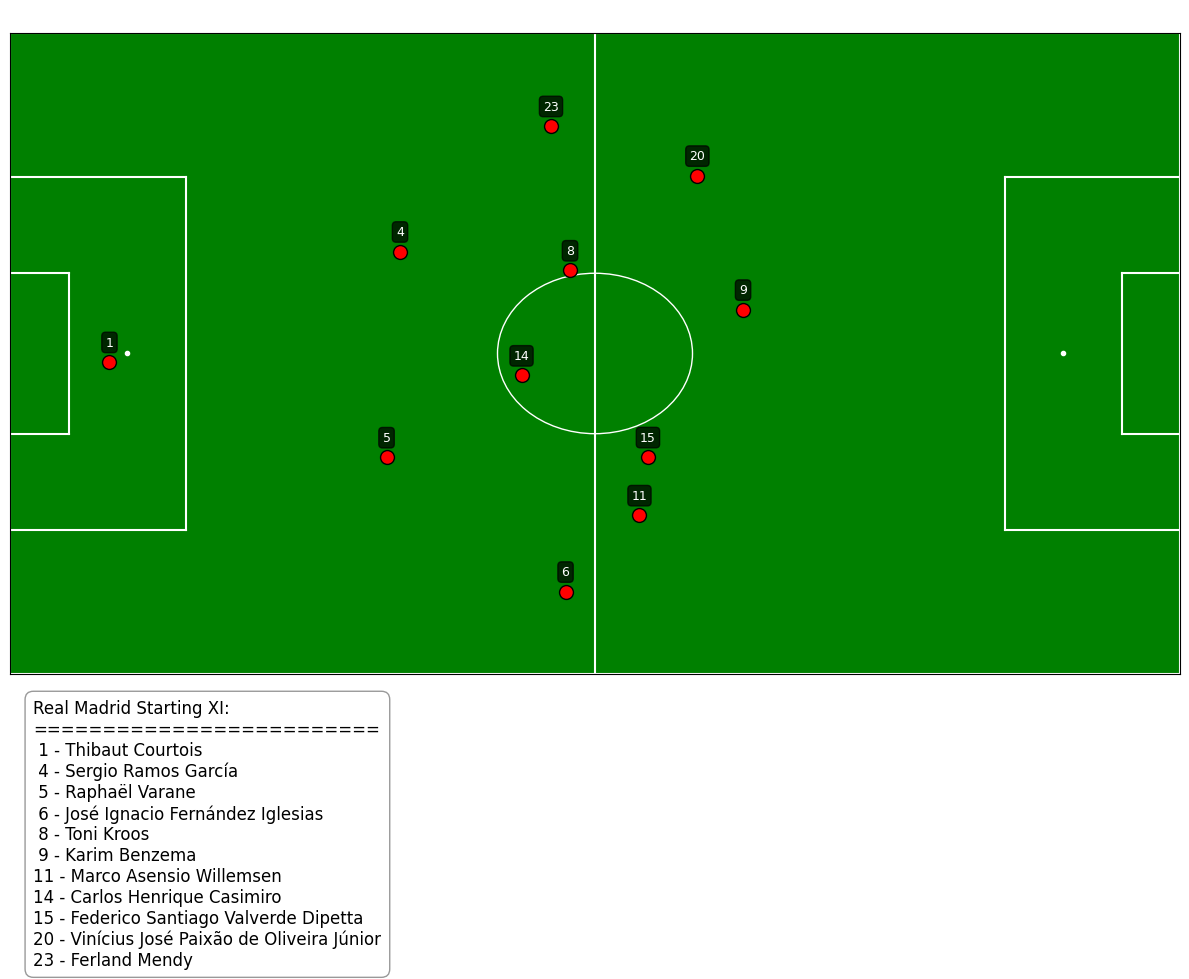

In [98]:
# Define a function to plot average positions
def plot_team_with_lineup(avg_positions_df, team_name, jersey_map):
    """
    Creates one figure with:
      - Top: a pitch, points for each player's avg x,y labeled by jersey only
      - Bottom: a textual listing of the lineup, # -> name
    """
    # We'll create a 2-row layout: top is pitch, bottom is text
    fig = plt.figure(figsize=(12,10))
    gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[4,1])
    
    # -- TOP: PITCH --
    ax_pitch = fig.add_subplot(gs[0,0])
    draw_pitch(ax=ax_pitch)
    ax_pitch.set_title(f"{team_name} - Average On-Ball Positions (Starters)", color="white", fontsize=14)
    
    # Plot the positions
    ax_pitch.scatter(avg_positions_df['x'], avg_positions_df['y'],
                     s=100, c='red', edgecolors='black', linewidths=1.0)
    
    # Label each dot with the jersey number
    for _, row in avg_positions_df.iterrows():
        num_str = str(row['jersey_number'])
        ax_pitch.text(row['x'], row['y'] - 2, num_str,
                      color='white', ha='center', fontsize=9,
                      bbox=dict(boxstyle="round,pad=0.3", fc="black", alpha=0.7))

   # -- BOTTOM: LINEUP TEXT --
    ax_lineup = fig.add_subplot(gs[1, 0])
    ax_lineup.axis('off')  # Hide axis lines/ticks

    # Sort the dictionary by jersey number
    sorted_lineup = sorted(jersey_map.items(), key=lambda item: item[1])

    # We'll build a multiline string
    lines = []
    lines.append(f"{team_name} Starting XI:")
    lines.append("=" * 25)
    for full_name, number in sorted_lineup:
        # Format the jersey number into 2 chars wide, right-aligned
        # Then append " - <full_name>"
        line_str = f"{number:2d} - {full_name}"
        lines.append(line_str)

    # Join them with newlines
    full_text = "\n".join(lines)

    # We can place the text with a white, semi‐transparent box behind it
    ax_lineup.text(
        0.02, 0.5, 
        full_text, 
        va='center', ha='left', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.4)
    )


    plt.tight_layout()
    plt.show()


# Plot for the home team
plot_team_with_lineup(home_avg_positions, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions, away_team, away_jersey_map)


## Step 5.1: Latest Match

Let's follow the same instructions of the previous step to do the same for the latest match in the dataset

In [99]:
# Load the latest competition
comps = sb.competitions()

# Extract the numeric year from the 'season_name' (e.g. "2020/2021" -> "2020")
comps['season_year'] = comps['season_name'].str[:4].astype(int)

# Sort by year (descending) so the top row is the latest
comps_sorted = comps.sort_values(by='season_year', ascending=False).reset_index(drop=True)

# Pick the FIRST row in the sorted DF -> the LATEST competition
latest_comp_row = comps_sorted.iloc[0]
cid = latest_comp_row['competition_id']
sid = latest_comp_row['season_id']

print("Latest competition by year:", latest_comp_row['competition_name'] + " " + latest_comp_row['season_name'])
print("Year (Season):", latest_comp_row['season_name'])
print("competition_id =", cid)
print("season_id =", sid)


Latest competition by year: Copa America 2024
Year (Season): 2024
competition_id = 223
season_id = 282


In [100]:
# Load matches for the latest competition
comp_matches = sb.matches(competition_id=cid, season_id=sid)

# Sort by match_date ascending
comp_matches = comp_matches.sort_values(by='match_date')

# Pick the final row => the most recent match date in that competition
last_match_id = comp_matches.iloc[-1]['match_id']
print("Most recent match_id in that competition:", last_match_id)

Most recent match_id in that competition: 3943077


In [101]:
# We'll assume you've already run:
# comp_matches = sb.matches(competition_id=cid, season_id=sid)
# comp_matches = comp_matches.sort_values(by='match_date')

# Pick the last row => the most recent match
latest_match = comp_matches.iloc[-1]

# Extract date, teams, and scores
match_date  = latest_match['match_date']
home_team   = latest_match['home_team']
away_team   = latest_match['away_team']
home_score  = latest_match['home_score']
away_score  = latest_match['away_score']

# Print a simple summary
print(f"[ID: {last_match_id}] 📅 {match_date} | ⚽ {home_team} - {away_team} {home_score}:{away_score}")

[ID: 3943077] 📅 2024-07-15 | ⚽ Argentina - Colombia 1:0


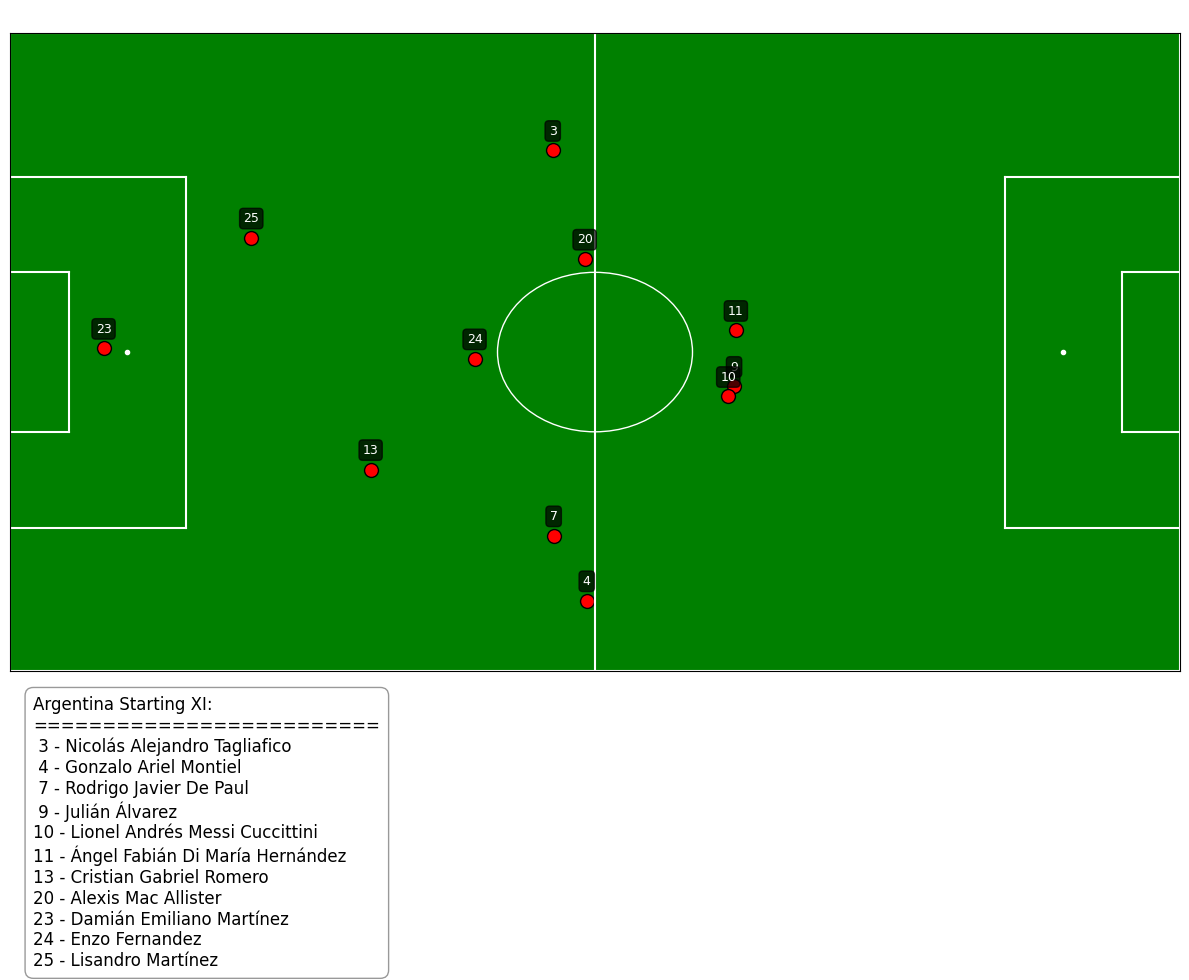

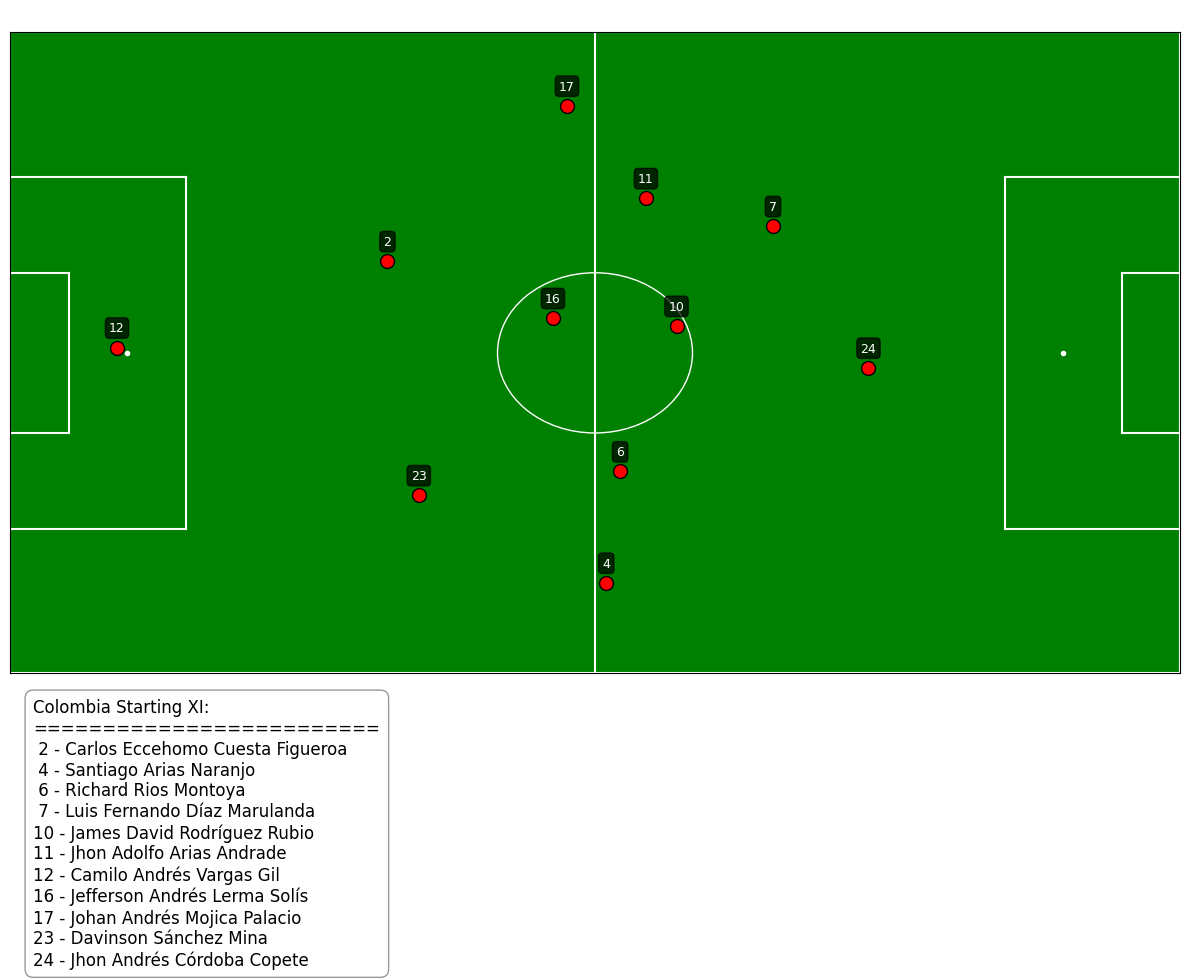

In [102]:
# Load events for the latest match
events_latest = sb.events(match_id=last_match_id)

# Extract the Starting XI for each team and build a map of player names to jersey numbers
home_jersey_map = build_xi_jersey_map(events_latest, home_team)
away_jersey_map = build_xi_jersey_map(events_latest, away_team)

# Filter for Starting XI players only
all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

# Filter events to only include the Starting XI players
events_latest_starters = events_latest[events_latest['player'].isin(all_starters)].copy()
    
# Add a new column for jersey number
events_latest_starters['jersey_number'] = events_latest_starters['player'].apply(get_jersey_number)

# Compute average positions for each player
home_events_latest = events_latest_starters[events_latest_starters['team'] == home_team]
away_events_latest = events_latest_starters[events_latest_starters['team'] == away_team]

home_avg_positions_latest = compute_average_positions(home_events_latest)
away_avg_positions_latest = compute_average_positions(away_events_latest)

# Plot for the home team
plot_team_with_lineup(home_avg_positions_latest, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions_latest, away_team, away_jersey_map)

# Step 5.2: First Match

Let's follow the same instructions of the previous step to do the same for the firstt match in the dataset

In [105]:
# Load the latest competition
comps = sb.competitions()

# Extract the numeric year from the 'season_name' (e.g. "2020/2021" -> "2020")
comps['season_year'] = comps['season_name'].str[:4].astype(int)

# Sort by year (ascending) so the top row is the older
comps_sorted = comps.sort_values(by='season_year', ascending=True).reset_index(drop=True)

# Pick the FIRST row in the sorted DF -> the OLDEST competition
latest_comp_row = comps_sorted.iloc[0]
cid = latest_comp_row['competition_id']
sid = latest_comp_row['season_id']

print("Latest competition by year:", latest_comp_row['competition_name'] + " " + latest_comp_row['season_name'])
print("Year (Season):", latest_comp_row['season_name'])
print("competition_id =", cid)
print("season_id =", sid)


Latest competition by year: FIFA World Cup 1958
Year (Season): 1958
competition_id = 43
season_id = 269


In [106]:
# Load matches for the latest competition
comp_matches = sb.matches(competition_id=cid, season_id=sid)

# Sort by match_date ascending
comp_matches = comp_matches.sort_values(by='match_date')

# Pick the first row => the most recent match date in that competition
first_match_id = comp_matches.iloc[0]['match_id']
print("Most oldest match_id in that competition:", first_match_id)

Most oldest match_id in that competition: 3888704


In [115]:
# Pick the first row => the oldest match
oldest_match = comp_matches.iloc[0]

# Extract date, teams, and scores
match_date  = oldest_match['match_date']
home_team   = oldest_match['home_team']
away_team   = oldest_match['away_team']
home_score  = oldest_match['home_score']
away_score  = oldest_match['away_score']

# Print a simple summary
print(f"[ID: {first_match_id}] 📅 {match_date} | ⚽ {home_team} - {away_team} {home_score}:{away_score}")

[ID: 3888704] 📅 1958-06-24 | ⚽ Brazil - France 5:2


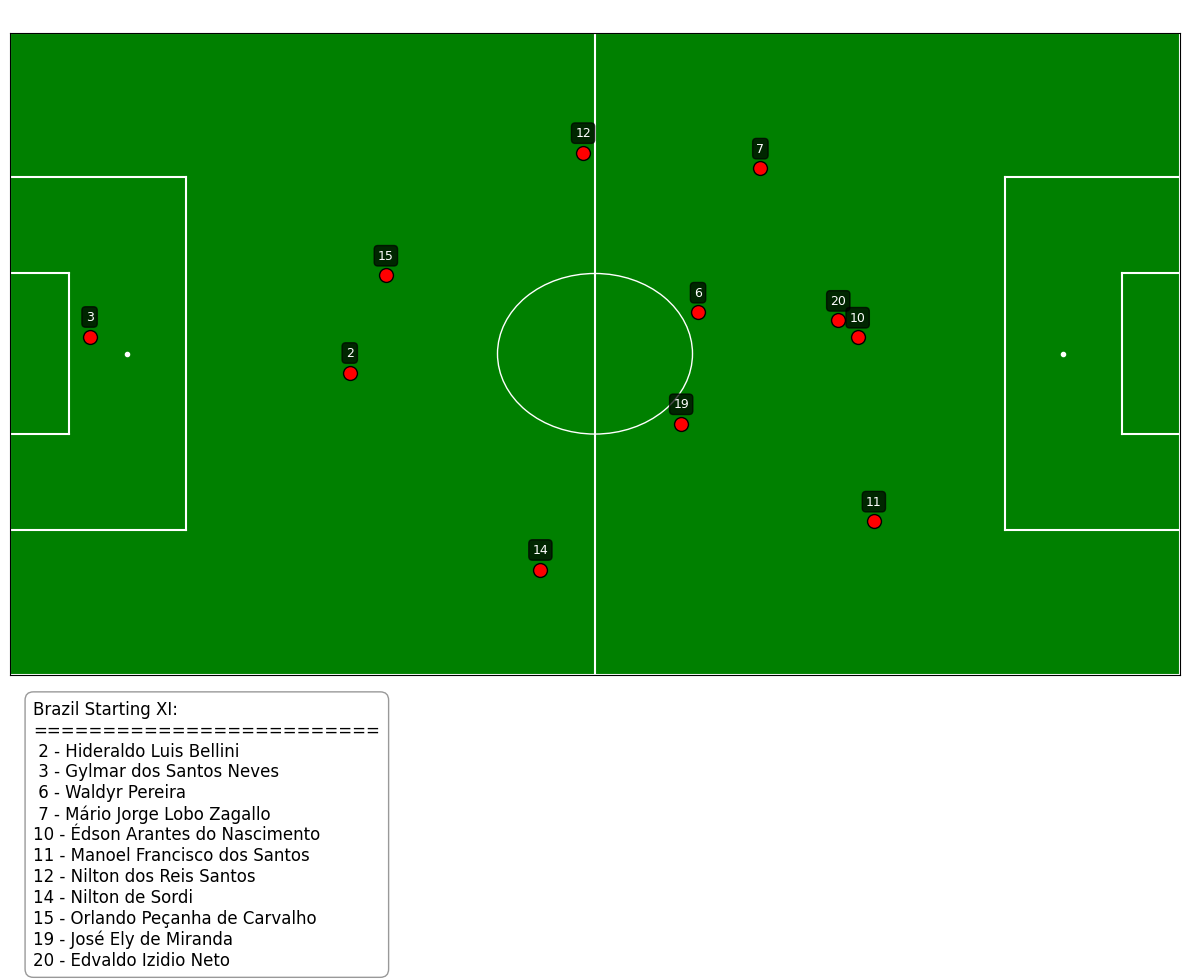

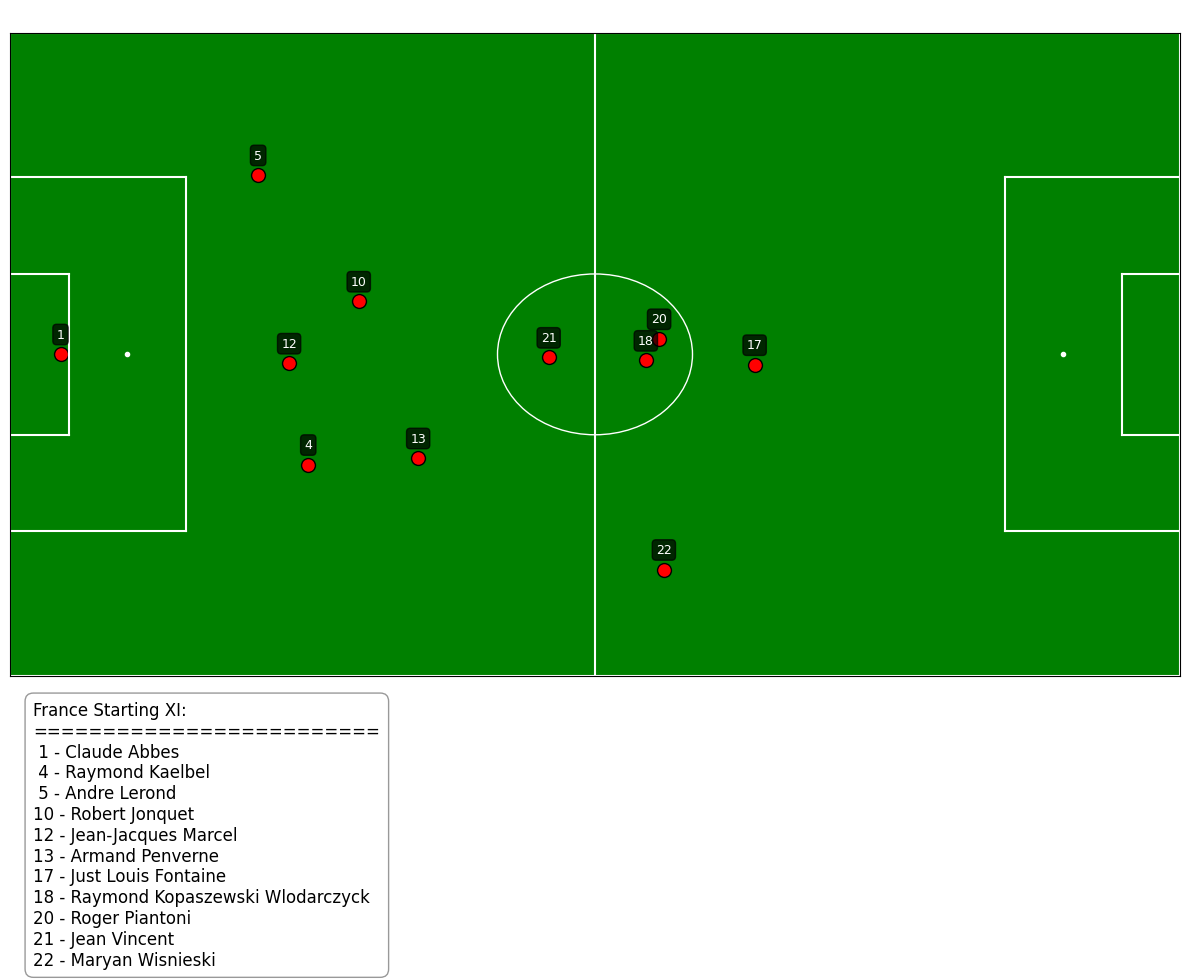

In [120]:
# Load events for the older match
events_older = sb.events(match_id=first_match_id)

# Extract the Starting XI for each team and build a map of player names to jersey numbers
home_jersey_map = build_xi_jersey_map(events_older, home_team)
away_jersey_map = build_xi_jersey_map(events_older, away_team)

# Filter for Starting XI players only
all_starters = set(home_jersey_map.keys()).union(away_jersey_map.keys())

# Filter events to only include the Starting XI players
events_older_starters = events_older[events_older['player'].isin(all_starters)].copy()
    
# Add a new column for jersey number
events_older_starters['jersey_number'] = events_older_starters['player'].apply(get_jersey_number)

# Compute average positions for each player
home_events_older = events_older_starters[events_older_starters['team'] == home_team]
away_events_older = events_older_starters[events_older_starters['team'] == away_team]

home_avg_positions_older= compute_average_positions(home_events_older)
away_avg_positions_older = compute_average_positions(away_events_older)

# Plot for the home team
plot_team_with_lineup(home_avg_positions_older, home_team, home_jersey_map)

# Plot for the away team
plot_team_with_lineup(away_avg_positions_older, away_team, away_jersey_map)